In [1]:
# for spatial distance calculations
# summarize data by subtype
import scimap as sm
import anndata as ad
import pandas as pd

def read_color_map(path):
    cmap_df = pd.read_excel(path)
    cmap_df.pop("Color")
    cmap_dict = pd.Series(cmap_df.Hex.values, index=cmap_df.Population).to_dict()
    return cmap_dict

anndata_path = "Multiplex_IHC_studies/Summer_Interns/2024/JT_spatial_analysis/IM_full_data.h5ad"
cmap_path = "Multiplex_IHC_studies/Eric_Berens/HuBrca_TMA_mIHC/DataAnalysis/ImmMimicry_ColorCodes.xlsx" 
adata = ad.read_h5ad(anndata_path)
# table of cell counts based on subtype by phenotype 

cmap = read_color_map(cmap_path)

Running SCIMAP  2.1.1


/home/lab/miniconda3/envs/scimap/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.



In [2]:
# grade fix
adata.obs.loc[adata.obs['Subject_ID'] == 'ST-00021143', 'Grade'] = 3

Processing Image: formatted_S15ROI01
Processing Image: formatted_S15ROI02
Processing Image: formatted_S15ROI03
Processing Image: formatted_S15ROI04
Processing Image: formatted_S15ROI05
Processing Image: formatted_S15ROI06
Processing Image: formatted_S15ROI07
Processing Image: formatted_S15ROI08
Processing Image: formatted_S15ROI09
Processing Image: formatted_S15ROI10
Processing Image: formatted_S15ROI14
Processing Image: formatted_S15ROI15
Processing Image: formatted_S15ROI16
Processing Image: formatted_S15ROI20
Processing Image: formatted_S15ROI21
Processing Image: formatted_S15ROI22
Processing Image: formatted_S15ROI23
Processing Image: formatted_S15ROI24
Processing Image: formatted_S15ROI25
Processing Image: formatted_S15ROI26
Processing Image: formatted_S15ROI27
Processing Image: formatted_S15ROI28
Processing Image: formatted_S15ROI29
Processing Image: formatted_S15ROI30
Processing Image: formatted_S15ROI31
Processing Image: formatted_S15ROI32
Processing Image: formatted_S15ROI33
P

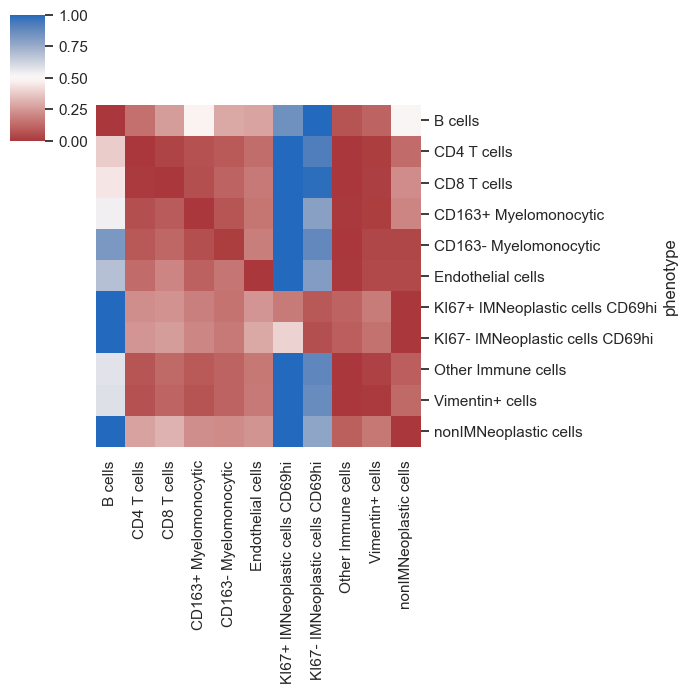

In [17]:
# generate spatial distance heatmap plot
adata = sm.tl.spatial_distance(adata, label='spatial_distance')
sm.pl.spatial_distance(adata, figsize=(7,7))

Processing Image: 3
                         KI67- IMNeoplastic cells CD69hi  \
formatted_S15ROI01_1880                        12.767805   
formatted_S15ROI01_3994                        11.680539   
formatted_S15ROI01_5302                        20.655518   
formatted_S15ROI01_2813                         8.656553   
formatted_S15ROI01_1                           51.945809   
...                                                  ...   
formatted_S6ROI80_8448                         11.294197   
formatted_S6ROI80_8499                         10.034413   
formatted_S6ROI80_8570                         37.156143   
formatted_S6ROI80_8606                          0.612970   
formatted_S6ROI80_8647                         16.359399   

                         KI67+ IMNeoplastic cells CD69hi  \
formatted_S15ROI01_1880                        56.516158   
formatted_S15ROI01_3994                        48.147745   
formatted_S15ROI01_5302                        94.228394   
formatted_S15ROI01_

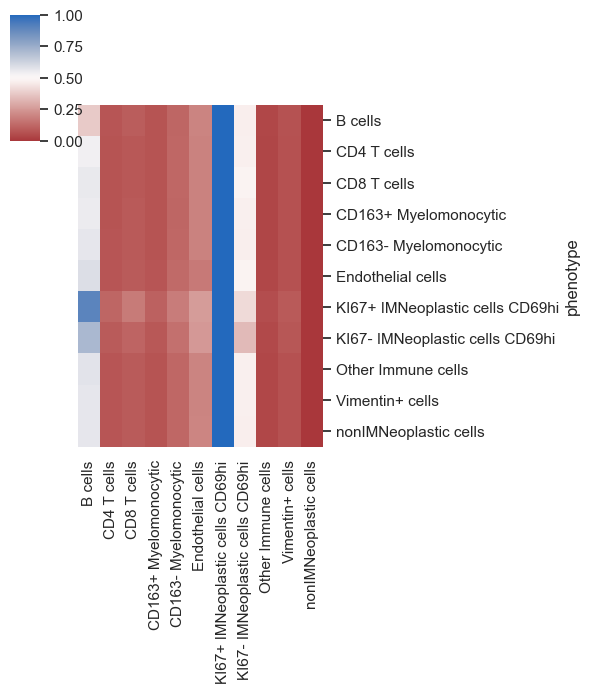

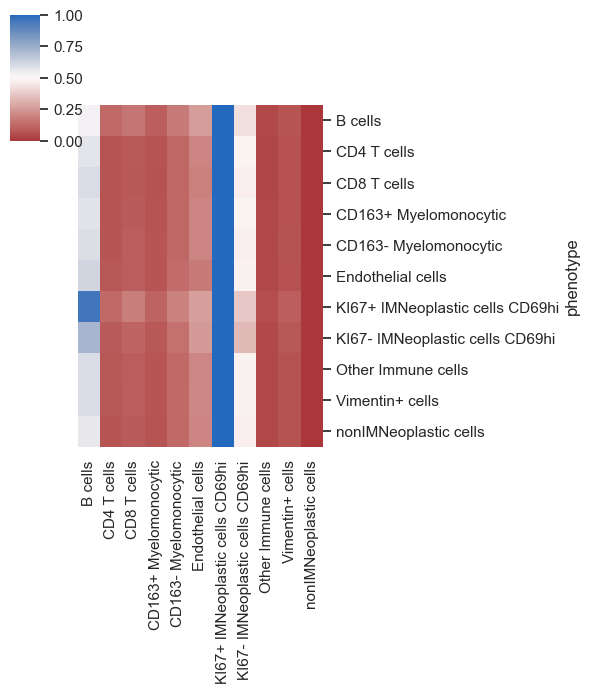

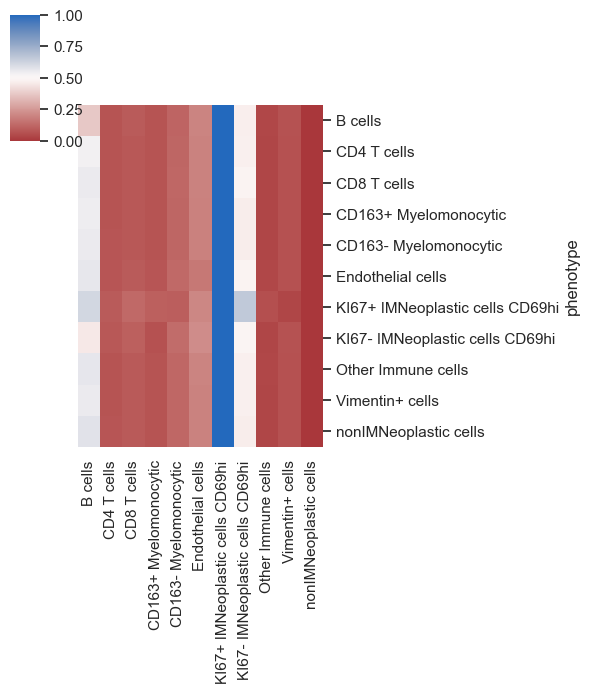

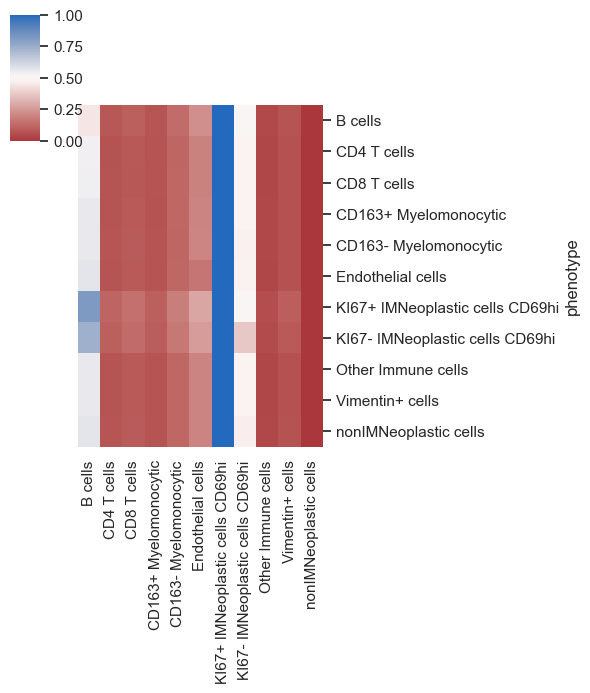

In [20]:
# separate this by group
# grade 3 pre/post ER +/-
adata=sm.tl.spatial_distance(adata, subset=[3], imageid="Grade", label='grade3_distance')
print(adata.uns['grade3_distance'])
# get pre-tx only
pre_tx = adata.obs[adata.obs['timepoint'] == 'Pre_Treatment']
pre_tx_erp = pre_tx[pre_tx['ER'] == 'P']
pre_tx_ern = pre_tx[pre_tx['ER'] == 'N']
pre_tx_ids = pre_tx['imageid'].index # list of pre-tx cells
pre_tx_erp_id = pre_tx_erp['imageid'].index
pre_tx_ern_id = pre_tx_ern['imageid'].index

adata.uns['grade3_distance'].reset_index(inplace=True)
adata.uns['grade3_pre_distance'] = adata.uns['grade3_distance'][adata.uns['grade3_distance']['index'].isin(pre_tx_ids)]
adata.uns['grade3_pre_erp_distance'] = adata.uns['grade3_pre_distance'][adata.uns['grade3_pre_distance']['index'].isin(pre_tx_erp_id)]
adata.uns['grade3_pre_ern_distance'] = adata.uns['grade3_pre_distance'][adata.uns['grade3_pre_distance']['index'].isin(pre_tx_ern_id)]
adata.uns['grade3_pre_distance'].set_index('index', inplace=True)
adata.uns['grade3_pre_erp_distance'].set_index('index', inplace=True)
adata.uns['grade3_pre_ern_distance'].set_index('index', inplace=True)

sm.pl.spatial_distance(adata, spatial_distance='grade3_pre_distance', subset_col="Grade", subset_value=[3], figsize=(6,7))
sm.pl.spatial_distance(adata, spatial_distance='grade3_pre_erp_distance', subset_col="Grade", subset_value=[3], figsize=(6,7))
sm.pl.spatial_distance(adata, spatial_distance='grade3_pre_ern_distance', subset_col="Grade", subset_value=[3], figsize=(6,7))

post_tx = adata.obs[adata.obs['timepoint'] == 'Post_Treatment']
post_tx_ids = post_tx['imageid'].index
adata.uns['grade3_post_distance'] = adata.uns['grade3_distance'][adata.uns['grade3_distance']['index'].isin(post_tx_ids)]
adata.uns['grade3_post_distance'].set_index('index', inplace=True)
sm.pl.spatial_distance(adata, spatial_distance='grade3_post_distance', subset_col="Grade", subset_value=[3], figsize=(6,7))


# adata=sm.tl.spatial_distance(adata, subset=[2], imageid="Grade", label='grade2_distance')
# sm.pl.spatial_distance(adata, subset_col="Grade", subset_value=[2], figsize=(6,7))

# adata=sm.tl.spatial_distance(adata, subset=[1], imageid="Grade", label='grade1_distance')
# sm.pl.spatial_distance(adata, subset_col="Grade", subset_value=[1], figsize=(6,7))

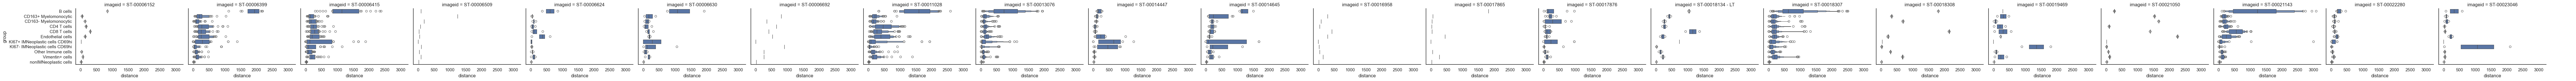

In [21]:
sm.pl.spatial_distance(adata, method="numeric", distance_from="KI67+ IMNeoplastic cells CD69hi", imageid="Subject_ID", height=3, aspect=11/8)
# creates numeric plots of shortest distance of phenotypes from tumor cells, for every image/ROI

/home/lab/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/spatial_distance.py:248: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



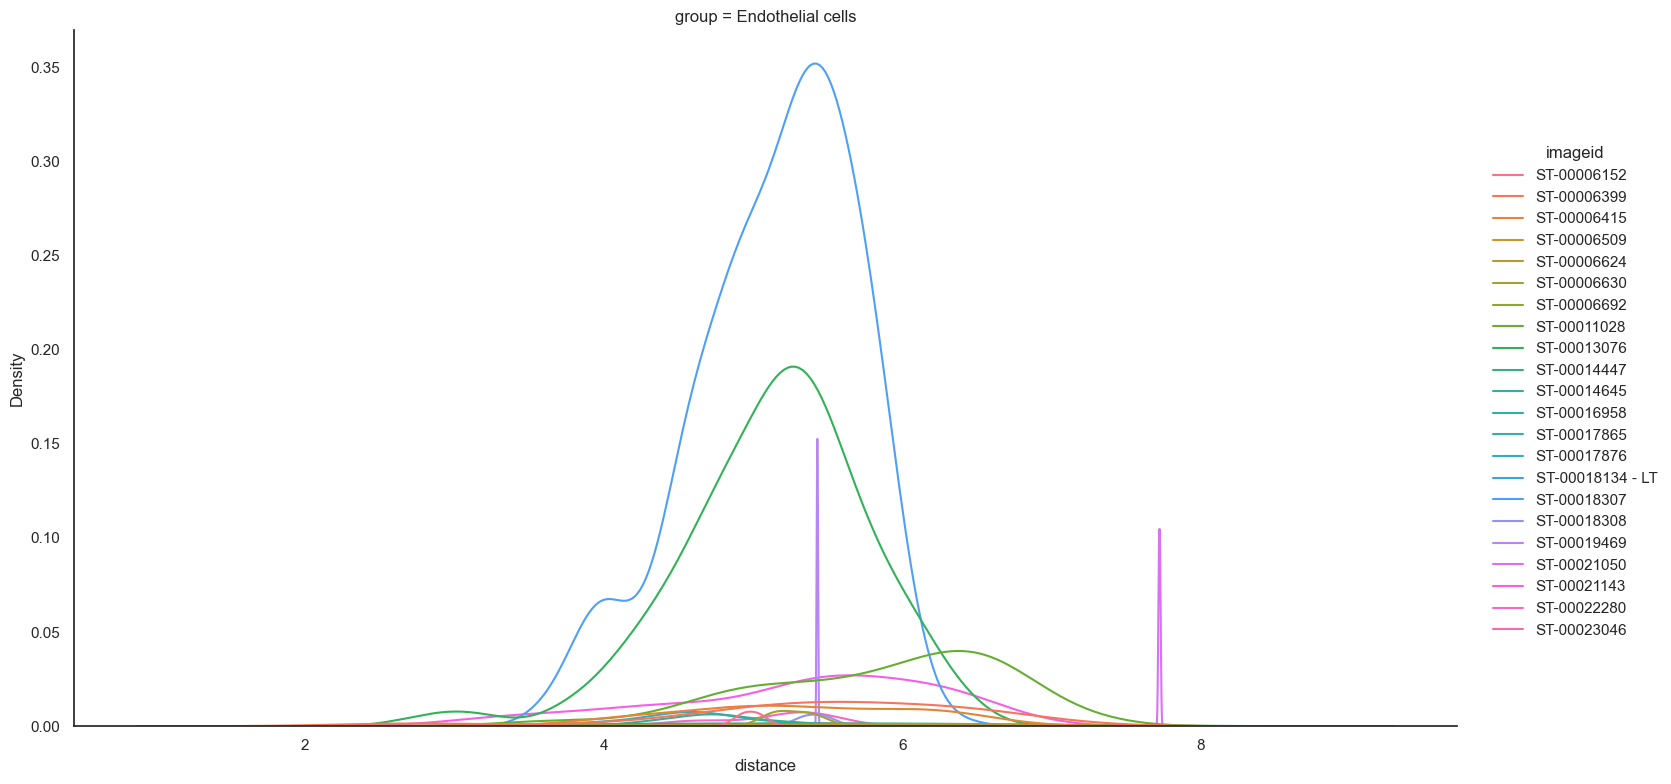

In [12]:
sm.pl.spatial_distance(adata, method='distribution', distance_from="KI67+ IMNeoplastic cells CD69hi", distance_to="Endothelial cells", imageid='Subject_ID', log=True, height=8, aspect=15/8)

/home/lab/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/spatial_distance.py:248: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



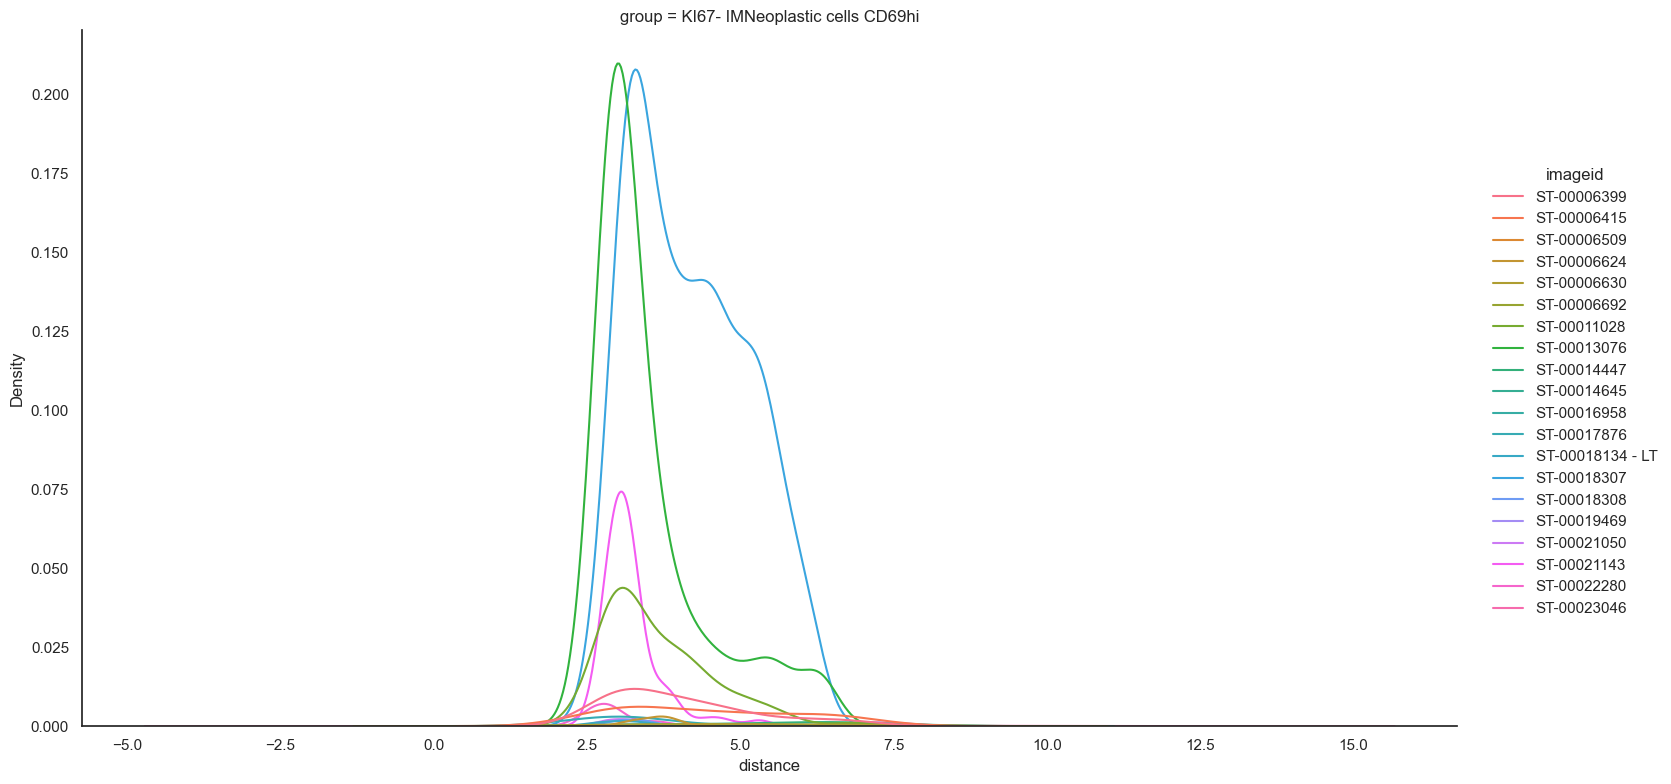

In [11]:
sm.pl.spatial_distance(adata, method='distribution', distance_from="KI67+ IMNeoplastic cells CD69hi", distance_to="KI67- IMNeoplastic cells CD69hi", imageid='Subject_ID', log=True, height=8, aspect=15/8)